# 02 - Data Preprocessing (Production-Ready)

This notebook implements a production-ready preprocessing pipeline for the used cars price prediction project.

## Features:
- ✅ Modular, reusable code
- ✅ Comprehensive error handling
- ✅ Data validation at each step
- ✅ Logging for tracking
- ✅ Configuration-driven approach
- ✅ Proper outlier handling
- ✅ Multiple imputation strategies
- ✅ Feature encoding and scaling
- ✅ Train-test split with validation
- ✅ Data quality reporting

## Pipeline Steps:
1. Load and validate raw data
2. Drop unnecessary columns
3. Filter by domain knowledge
4. Remove duplicates
5. Handle missing values
6. Detect and handle outliers
7. Encode categorical variables
8. Scale numerical features
9. Split into train/test sets
10. Save processed data

## 1. Setup and Imports

In [1]:
# Import libraries
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from config import *
from data_validator import DataValidator, validate_train_test_split
from preprocessing_pipeline import DataPreprocessor, split_data

# Set up plotting
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Configure Logging

In [2]:
# Create logs directory if it doesn't exist
log_dir = Path('../logs')
log_dir.mkdir(exist_ok=True)

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler(log_dir / 'preprocessing.log'),
        logging.StreamHandler()
    ]
)

logger = logging.getLogger(__name__)
logger.info("="*80)
logger.info("Starting Data Preprocessing Pipeline")
logger.info("="*80)

2026-02-13 14:02:20,287 - __main__ - INFO - ================================================================================
2026-02-13 14:02:20,289 - __main__ - INFO - Starting Data Preprocessing Pipeline
2026-02-13 14:02:20,290 - __main__ - INFO - ================================================================================


## 3. Load Raw Data

In [3]:
# Load data
logger.info(f"Loading data from: {RAW_DATA_PATH}")
df_raw = pd.read_csv(RAW_DATA_PATH)

print(f"Dataset shape: {df_raw.shape}")
print(f"\nFirst few rows:")
df_raw.head()

2026-02-13 14:02:20,313 - __main__ - INFO - Loading data from: ../data/raw/vehicles.csv


Dataset shape: (426880, 26)

First few rows:


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## 4. Validate Raw Data

In [4]:
# Initialize validator
validator = DataValidator(VALIDATION_CONFIG)

# Validate raw data
is_valid, issues = validator.validate_dataframe(df_raw, stage='raw')

print("\n" + "="*80)
print("RAW DATA VALIDATION")
print("="*80)
print(f"Valid: {is_valid}")
if issues:
    print(f"\nIssues found ({len(issues)}):")
    for i, issue in enumerate(issues, 1):
        print(f"  {i}. {issue}")
else:
    print("No issues found!")


RAW DATA VALIDATION
Valid: False

Issues found (2):
  1. Column 'size' has 71.77% missing values (max allowed: 50%)
  2. Column 'county' has 100.00% missing values (max allowed: 50%)


## 5. Validate Target Column

In [5]:
# Validate target column
is_valid, issues = validator.validate_target_column(df_raw, TARGET_COLUMN)

print("\n" + "="*80)
print("TARGET COLUMN VALIDATION")
print("="*80)
print(f"Target column: {TARGET_COLUMN}")
print(f"Valid: {is_valid}")
if issues:
    print(f"\nIssues found ({len(issues)}):")
    for i, issue in enumerate(issues, 1):
        print(f"  {i}. {issue}")
else:
    print("No issues found!")


TARGET COLUMN VALIDATION
Target column: price
Valid: True
No issues found!


## 6. Generate Data Quality Report

In [6]:
# Generate quality report
quality_report = validator.generate_data_quality_report(df_raw)

print("\n" + "="*80)
print("DATA QUALITY REPORT")
print("="*80)
print(quality_report.to_string(index=False))

# Save report
report_path = Path('../data/processed/data_quality_report_raw.csv')
report_path.parent.mkdir(exist_ok=True, parents=True)
quality_report.to_csv(report_path, index=False)
logger.info(f"Data quality report saved to: {report_path}")

2026-02-13 14:03:04,433 - __main__ - INFO - Data quality report saved to: ..\data\processed\data_quality_report_raw.csv



DATA QUALITY REPORT
      Column   Dtype  Missing_Count Missing_Percentage  Unique_Values  Duplicate_Count          Mean         Std           Min           Max   Zeros  Negatives                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

## 7. Visualize Missing Data

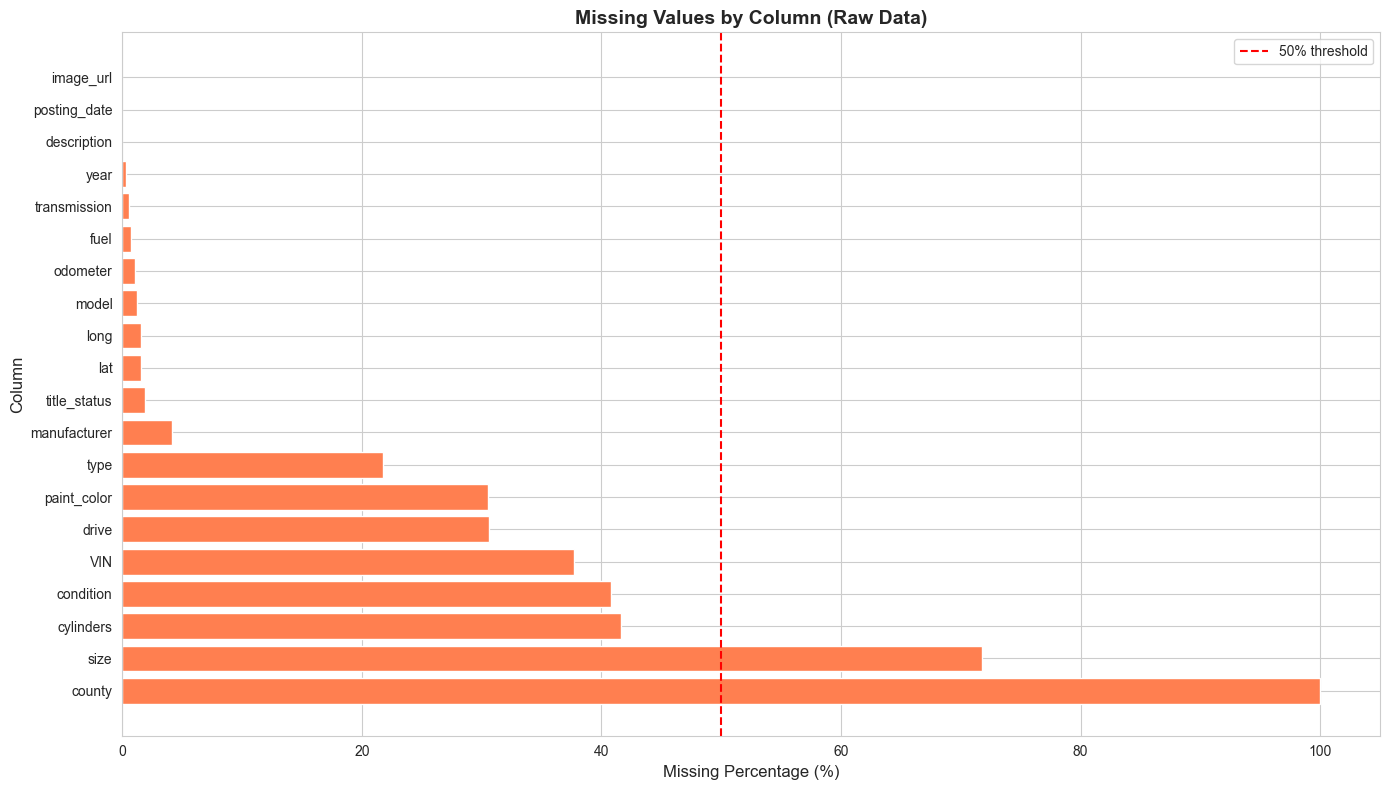

In [7]:
# Calculate missing percentages
missing_data = pd.DataFrame({
    'Column': df_raw.columns,
    'Missing_Count': df_raw.isnull().sum(),
    'Missing_Percentage': (df_raw.isnull().sum() / len(df_raw)) * 100
}).sort_values('Missing_Percentage', ascending=False)

# Filter columns with missing data
missing_data = missing_data[missing_data['Missing_Count'] > 0]

if len(missing_data) > 0:
    plt.figure(figsize=(14, 8))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Column', fontsize=12)
    plt.title('Missing Values by Column (Raw Data)', fontsize=14, fontweight='bold')
    plt.axvline(x=50, color='red', linestyle='--', label='50% threshold')
    plt.legend()
    plt.tight_layout()
    plt.savefig('../data/processed/missing_values_raw.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No missing values found!")

## 8. Run Preprocessing Pipeline

In [8]:
# Create configuration dictionary
config = {
    'COLUMNS_TO_DROP': COLUMNS_TO_DROP,
    'PRICE_FILTER': PRICE_FILTER,
    'YEAR_FILTER': YEAR_FILTER,
    'ODOMETER_FILTER': ODOMETER_FILTER,
    'IMPUTATION_STRATEGY': IMPUTATION_STRATEGY,
    'CONSTANT_VALUES': CONSTANT_VALUES,
    'TARGET_COLUMN': TARGET_COLUMN,
    'OUTLIER_CONFIG': OUTLIER_CONFIG,
    'NUMERICAL_COLUMNS': NUMERICAL_COLUMNS,
    'ENCODING_CONFIG': ENCODING_CONFIG,
    'SCALING_CONFIG': SCALING_CONFIG,
    'TRAIN_TEST_SPLIT': TRAIN_TEST_SPLIT
}

# Initialize preprocessor
preprocessor = DataPreprocessor(config)

# Run pipeline
print("\n" + "="*80)
print("RUNNING PREPROCESSING PIPELINE")
print("="*80)
df_processed = preprocessor.fit_transform(df_raw.copy())

print(f"\nFinal processed shape: {df_processed.shape}")
print(f"\nProcessed columns ({len(df_processed.columns)}):")
print(df_processed.columns.tolist())

2026-02-13 14:03:06,789 - preprocessing_pipeline - INFO - Starting preprocessing pipeline...
2026-02-13 14:03:06,790 - preprocessing_pipeline - INFO - Initial shape: (426880, 26)



RUNNING PREPROCESSING PIPELINE


2026-02-13 14:03:06,870 - preprocessing_pipeline - INFO - Dropped 8 columns: ['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'posting_date']
2026-02-13 14:03:06,873 - preprocessing_pipeline - INFO - After dropping columns: (426880, 18)
2026-02-13 14:03:07,056 - preprocessing_pipeline - INFO - Price filter: Removed 42218 rows
2026-02-13 14:03:07,144 - preprocessing_pipeline - INFO - Year filter: Removed 13007 rows
2026-02-13 14:03:07,220 - preprocessing_pipeline - INFO - Odometer filter: Removed 2869 rows
2026-02-13 14:03:07,239 - preprocessing_pipeline - INFO - After domain filtering: (368786, 18)
2026-02-13 14:03:07,761 - preprocessing_pipeline - INFO - Removed 44553 duplicate rows
2026-02-13 14:03:07,775 - preprocessing_pipeline - INFO - After removing duplicates: (324233, 18)
2026-02-13 14:03:07,870 - preprocessing_pipeline - INFO - Column 'manufacturer': Imputed 10543 missing values with mode 'ford'
2026-02-13 14:03:07,901 - preprocessing_pipeline - INFO - 


Final processed shape: (324233, 94)

Processed columns (94):
['region', 'price', 'year', 'model', 'condition', 'odometer', 'size', 'state', 'lat', 'long', 'manufacturer_alfa-romeo', 'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet', 'manufacturer_chrysler', 'manufacturer_dodge', 'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford', 'manufacturer_gmc', 'manufacturer_harley-davidson', 'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti', 'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia', 'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mazda', 'manufacturer_mercedes-benz', 'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi', 'manufacturer_morgan', 'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porsche', 'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn', 'manufacturer_suba

## 9. Validate Processed Data

In [9]:
# Validate processed data
is_valid, issues = validator.validate_dataframe(df_processed, stage='processed')

print("\n" + "="*80)
print("PROCESSED DATA VALIDATION")
print("="*80)
print(f"Valid: {is_valid}")
if issues:
    print(f"\nIssues found ({len(issues)}):")
    for i, issue in enumerate(issues, 1):
        print(f"  {i}. {issue}")
else:
    print("✅ All validation checks passed!")

# Check for missing values
missing_after = df_processed.isnull().sum().sum()
print(f"\nTotal missing values after preprocessing: {missing_after}")


PROCESSED DATA VALIDATION
Valid: False

Issues found (1):
  1. Found 180 duplicate rows

Total missing values after preprocessing: 6498


## 10. Generate Processed Data Quality Report

In [10]:
# Generate quality report for processed data
quality_report_processed = validator.generate_data_quality_report(df_processed)

print("\n" + "="*80)
print("PROCESSED DATA QUALITY REPORT")
print("="*80)
print(quality_report_processed.to_string(index=False))

# Save report
report_path = Path('../data/processed/data_quality_report_processed.csv')
quality_report_processed.to_csv(report_path, index=False)
logger.info(f"Processed data quality report saved to: {report_path}")

2026-02-13 14:03:13,232 - __main__ - INFO - Processed data quality report saved to: ..\data\processed\data_quality_report_processed.csv



PROCESSED DATA QUALITY REPORT
                      Column   Dtype  Missing_Count Missing_Percentage  Unique_Values  Duplicate_Count     Mean      Std    Min      Max  Zeros  Negatives
                      region   int64              0              0.00%            404           323829   193.48   118.11   0.00   403.00   2429          0
                       price   int64              0              0.00%          13871           310362 19234.25 13685.34 500.00 58150.00      0          0
                        year float64              0              0.00%             29           324204     0.00     1.00  -3.04     1.66      0     138737
                       model   int64              0              0.00%          24484           299749 13678.58  6618.85   0.00 24483.00      1          0
                   condition   int64              0              0.00%              6           324227     2.33     0.62   0.00     5.00    456          0
                    odometer float64   

## 11. Split Data into Train and Test Sets

In [11]:
# Split data
print("\n" + "="*80)
print("SPLITTING DATA")
print("="*80)

X_train, X_test, y_train, y_test = split_data(df_processed, config)

print(f"\nTrain set:")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"\nTest set:")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_test shape: {y_test.shape}")

# Validate split
is_valid, issues = validate_train_test_split(X_train, X_test, y_train, y_test)
print(f"\nSplit validation: {'✅ Valid' if is_valid else '❌ Invalid'}")
if issues:
    for issue in issues:
        print(f"  - {issue}")


SPLITTING DATA


2026-02-13 14:03:13,677 - preprocessing_pipeline - INFO - Train set: (259386, 93), Test set: (64847, 93)



Train set:
  X_train shape: (259386, 93)
  y_train shape: (259386,)

Test set:
  X_test shape: (64847, 93)
  y_test shape: (64847,)

Split validation: ✅ Valid


## 12. Visualize Target Distribution

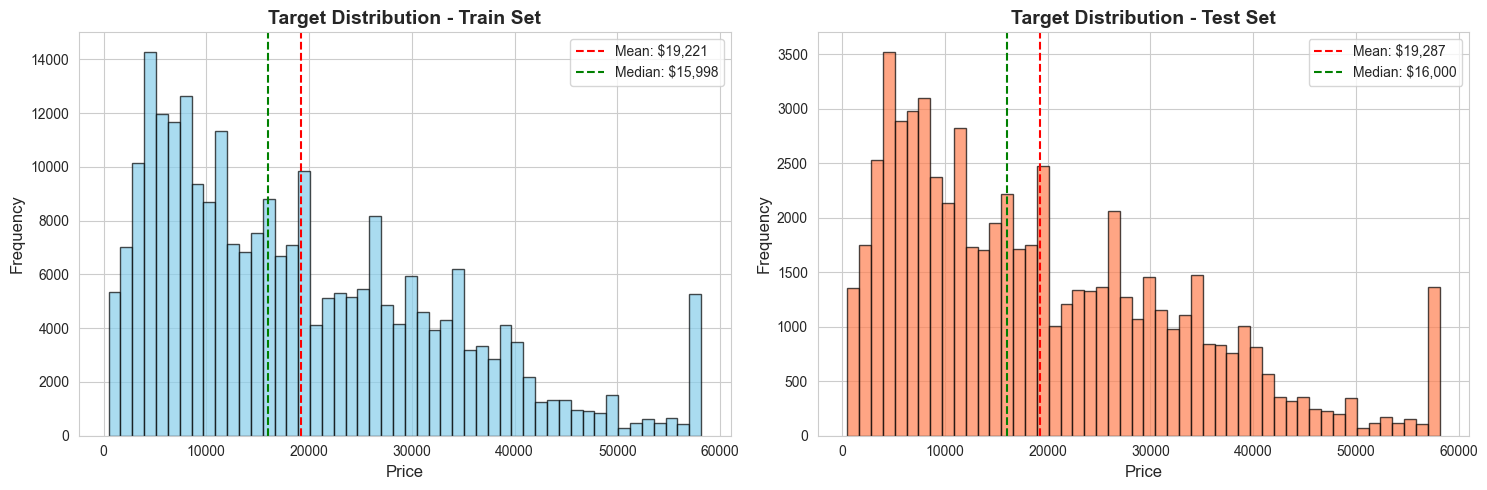


Target Statistics:

Train set:
  Mean: $19,221.02
  Median: $15,998.00
  Std: $13,679.98
  Min: $500.00
  Max: $58,150.00

Test set:
  Mean: $19,287.16
  Median: $16,000.00
  Std: $13,706.73
  Min: $500.00
  Max: $58,150.00


In [12]:
# Plot target distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Train set
axes[0].hist(y_train, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Target Distribution - Train Set', fontsize=14, fontweight='bold')
axes[0].axvline(y_train.mean(), color='red', linestyle='--', label=f'Mean: ${y_train.mean():,.0f}')
axes[0].axvline(y_train.median(), color='green', linestyle='--', label=f'Median: ${y_train.median():,.0f}')
axes[0].legend()

# Test set
axes[1].hist(y_test, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Price', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Target Distribution - Test Set', fontsize=14, fontweight='bold')
axes[1].axvline(y_test.mean(), color='red', linestyle='--', label=f'Mean: ${y_test.mean():,.0f}')
axes[1].axvline(y_test.median(), color='green', linestyle='--', label=f'Median: ${y_test.median():,.0f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('../data/processed/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print("\nTarget Statistics:")
print(f"\nTrain set:")
print(f"  Mean: ${y_train.mean():,.2f}")
print(f"  Median: ${y_train.median():,.2f}")
print(f"  Std: ${y_train.std():,.2f}")
print(f"  Min: ${y_train.min():,.2f}")
print(f"  Max: ${y_train.max():,.2f}")

print(f"\nTest set:")
print(f"  Mean: ${y_test.mean():,.2f}")
print(f"  Median: ${y_test.median():,.2f}")
print(f"  Std: ${y_test.std():,.2f}")
print(f"  Min: ${y_test.min():,.2f}")
print(f"  Max: ${y_test.max():,.2f}")

## 13. Save Processed Data

In [13]:
# Create processed data directory
processed_dir = Path(PROCESSED_DATA_PATH)
processed_dir.mkdir(exist_ok=True, parents=True)

# Save datasets
print("\n" + "="*80)
print("SAVING PROCESSED DATA")
print("="*80)

# Save full processed dataset
df_processed.to_csv(processed_dir / 'cleaned_data.csv', index=False)
logger.info(f"Saved: cleaned_data.csv")

# Save train/test splits
X_train.to_csv(processed_dir / 'X_train.csv', index=False)
logger.info(f"Saved: X_train.csv")

X_test.to_csv(processed_dir / 'X_test.csv', index=False)
logger.info(f"Saved: X_test.csv")

y_train.to_csv(processed_dir / 'y_train.csv', index=False)
logger.info(f"Saved: y_train.csv")

y_test.to_csv(processed_dir / 'y_test.csv', index=False)
logger.info(f"Saved: y_test.csv")

print("\n✅ All data saved successfully!")
print(f"\nSaved to: {processed_dir.absolute()}")


SAVING PROCESSED DATA


2026-02-13 14:03:24,959 - __main__ - INFO - Saved: cleaned_data.csv
2026-02-13 14:03:32,082 - __main__ - INFO - Saved: X_train.csv
2026-02-13 14:03:33,683 - __main__ - INFO - Saved: X_test.csv
2026-02-13 14:03:33,826 - __main__ - INFO - Saved: y_train.csv
2026-02-13 14:03:33,856 - __main__ - INFO - Saved: y_test.csv



✅ All data saved successfully!

Saved to: e:\my-learning\AI-Learning\used-cars-price-prediction\notebooks\..\data\processed


## 14. Save Preprocessing Pipeline

In [14]:
# Save preprocessor for later use
import pickle

model_dir = Path('../models')
model_dir.mkdir(exist_ok=True, parents=True)

preprocessor_path = model_dir / 'preprocessor.pkl'
with open(preprocessor_path, 'wb') as f:
    pickle.dump(preprocessor, f)

logger.info(f"Preprocessor saved to: {preprocessor_path}")
print(f"\n✅ Preprocessor saved to: {preprocessor_path}")
print("\nYou can load it later with:")
print("```python")
print("import pickle")
print("with open('preprocessor.pkl', 'rb') as f:")
print("    preprocessor = pickle.load(f)")
print("df_new_processed = preprocessor.transform(df_new)")
print("```")

2026-02-13 14:03:33,892 - __main__ - INFO - Preprocessor saved to: ..\models\preprocessor.pkl



✅ Preprocessor saved to: ..\models\preprocessor.pkl

You can load it later with:
```python
import pickle
with open('preprocessor.pkl', 'rb') as f:
    preprocessor = pickle.load(f)
df_new_processed = preprocessor.transform(df_new)
```


## 15. Summary

In [15]:
# Print summary
print("\n" + "="*80)
print("PREPROCESSING SUMMARY")
print("="*80)

print(f"\n📊 Data Transformation:")
print(f"  Raw data shape: {df_raw.shape}")
print(f"  Processed data shape: {df_processed.shape}")
print(f"  Rows removed: {len(df_raw) - len(df_processed)} ({((len(df_raw) - len(df_processed)) / len(df_raw) * 100):.2f}%)")
print(f"  Columns removed: {len(df_raw.columns) - len(df_processed.columns)}")
print(f"  Features created: {len(df_processed.columns) - len(df_raw.columns) + len(COLUMNS_TO_DROP)}")

print(f"\n🎯 Train/Test Split:")
print(f"  Train samples: {len(X_train):,} ({len(X_train) / len(df_processed) * 100:.1f}%)")
print(f"  Test samples: {len(X_test):,} ({len(X_test) / len(df_processed) * 100:.1f}%)")
print(f"  Features: {X_train.shape[1]}")

print(f"\n💾 Files Saved:")
print(f"  - cleaned_data.csv")
print(f"  - X_train.csv, X_test.csv")
print(f"  - y_train.csv, y_test.csv")
print(f"  - preprocessor.pkl")
print(f"  - data_quality_report_raw.csv")
print(f"  - data_quality_report_processed.csv")
print(f"  - missing_values_raw.png")
print(f"  - target_distribution.png")

print("\n" + "="*80)
print("✅ PREPROCESSING PIPELINE COMPLETED SUCCESSFULLY!")
print("="*80)

logger.info("Preprocessing pipeline completed successfully!")

2026-02-13 14:03:33,919 - __main__ - INFO - Preprocessing pipeline completed successfully!



PREPROCESSING SUMMARY

📊 Data Transformation:
  Raw data shape: (426880, 26)
  Processed data shape: (324233, 94)
  Rows removed: 102647 (24.05%)
  Columns removed: -68
  Features created: 76

🎯 Train/Test Split:
  Train samples: 259,386 (80.0%)
  Test samples: 64,847 (20.0%)
  Features: 93

💾 Files Saved:
  - cleaned_data.csv
  - X_train.csv, X_test.csv
  - y_train.csv, y_test.csv
  - preprocessor.pkl
  - data_quality_report_raw.csv
  - data_quality_report_processed.csv
  - missing_values_raw.png
  - target_distribution.png

✅ PREPROCESSING PIPELINE COMPLETED SUCCESSFULLY!


## Next Steps

Now that the data is preprocessed, you can:

1. **Feature Engineering**: Create additional features from existing ones
2. **Feature Selection**: Select the most important features
3. **Model Training**: Train machine learning models
4. **Model Evaluation**: Evaluate model performance
5. **Hyperparameter Tuning**: Optimize model parameters

The preprocessor can be reused on new data:
```python
# Load preprocessor
with open('../models/preprocessor.pkl', 'rb') as f:
    preprocessor = pickle.load(f)

# Transform new data
df_new_processed = preprocessor.transform(df_new)
```